# Kings County Real Estate Analysis

Please fill out:
* Student name: Andrew Bennett
* Student pace: self paced / **part time** / full time
* Scheduled project review date/time: **Sept. 7th 2:00pm** 
* Instructor name: Morgan Jones
* Blog post URL: https://dev.to/bennettandrewm/false-myths-of-false-positives-3kmd


## 1. Project Overview
A Seattle real estate brokerage wants to expand their services to developers. They're offering "state of the art" data analysis to new developers in the area on where and what to build, as it relates to price. They want to partner with you to serve as their in-house data engineer to build, operate, and interface with the model.

This analysis would include, at a minimum, a linear regression model to examine the relationship between square footage and zip code on price. They'd also like to see how other factors affect the price, if at all.

## 2. Business Understanding
The Seattle real estate market is always competitive. To stay ahead of the competition, a brokerage firm must attract new clients and keep them. To do this, KRG Realty is providing a data analytics package to lure buyers and sellers and developers to their business. This new package would provide linear regression modeling to analyze the relationship between square footage and zipcode at a minimum. 

## 3. Data Import and Inspection
To perform this analysis, we're utilizing data from the Kings County House Sales dataset in the form of a csv file (`data/kc_house_data.csv`).

### Step 1 - Import Data
Let's import the data and see what it looks like.

In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd

kc = pd.read_csv('data/kc_house_data.csv')
kc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


We've successfully imported the CSV file into a data frame. We can see that there are 25 columns in this dataframe. Let's go ahead and input those columns name.

### Step 2 - Data Inspection
As we inspect the data, we're going to start with the General Information and work our way into classifying the data at numeric or categorical. Within numeric, will breakdown to discrete and

#### General Information

In [3]:
columns = kc.columns
columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

We have the column names, stored here. It looks like we have a lot of standard real estate information, coupled with other address data. Let's see which information is numeric vs which is categoric.

In [4]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
numeric_cont = ['date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'lat', 'long']
numeric_disc = ['bedrooms', 'bathrooms', 'floors']
categorical = ['waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'address']

Great, so we've got our our columns saved AND we have them saved by variable type. We're in good shape, so far. Let's take a look at each of variable types and see if we can see anything, interesting.

#### Numeric Continuous

In [6]:
kc[numeric_cont].describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,1.108536e+06,2112.424739,1.672360e+04,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,8.963857e+05,974.044318,6.038260e+04,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,2.736000e+04,3.000000,4.020000e+02,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.480000e+05,1420.000000,4.850000e+03,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,8.600000e+05,1920.000000,7.480000e+03,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,1.300000e+06,2619.500000,1.057900e+04,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,3.075000e+07,15360.000000,3.253932e+06,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Okay, so a few things interesting here:
`price` - looks okay, min is 27000, max is 30,000,000, mean is 1.1M which is higher than median 860,000. 30M seems high, but can't tell if it will skew anything.
`sqft` - min of 3.000 looks small. Perhaps we should clean that up. Other dats looks okay. Max is quite high.
`sqft_lot` - min of 402 sq.ft lot is small. other data looks okay.
`sqft_above` - min of 2 sq.ft living space is small. other data looks okay.
`sqft_basement` - max of 8020 sq.ft living space is probably too large. nothing else obviously off.
`yr_built` - min year is 1900. That means subtracting by 1900 would be a good way to adjust the year.
`yr_renovated` - most homes haven't been remodeled. Nothing to adjust here.

#### Numeric Discrete

In [7]:
kc[numeric_disc].describe()

,bedrooms,bathrooms,floors
count,30155.000000,30155.000000,30155.000000
mean,3.413530,2.334737,1.543492
std,0.981612,0.889556,0.567717
min,0.000000,0.000000,1.000000
25%,3.000000,2.000000,1.000000
50%,3.000000,2.500000,1.500000
75%,4.000000,3.000000,2.000000
max,13.000000,10.500000,4.000000


Some things that stand out:
`bedrooms` - min of bedrooms looks unrealistic, unless we're talking about studio apartments. Perhaps we should clean that up. Max is quite high.
`bathrooms` - min of 0 is small and doesn't really quantify and new construction.
`floors` - min of 2 sq.ft living space is small. other data looks okay. Although, we're not really sure what floors mean.

In [8]:
##Lets print the categorical data
kc[categorical]

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ..."
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing..."
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9..."
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington..."
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt..."
...,...,...,...,...,...,...,...,...,...
30150,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,"4673 Eastern Avenue North, Seattle, Washington..."
30151,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,"4131 44th Avenue Southwest, Seattle, Washingto..."
30152,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,"910 Martin Luther King Jr Way, Seattle, Washin..."
30153,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,"17127 114th Avenue Southeast, Renton, Washingt..."


Some things that stand out:
`price`, `waterfront`, and `nuisance` - binary categories of yes, no, except water appears to include the water it faces
`view` - has different descriptions of the quality of the view.
`condition` - string description of the quality
`grade` - min of 2 sq.ft living space is small. other data looks okay.
`heat_source`, `sewer_system` - describe the systems with a string.
`address` - includes the full address as a string.


In [9]:
kc['condition'].value_counts()

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64

The `condition` category has 5 different values, with "average" being the most popular. This is a tricky category to factor because the "Average" vlaue is roughly 60% of the data. That's not to say it couldn't be used.

In [10]:
kc['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

Okay, this looks like a promising category. It appears that we have a range of numbers 1-13. We can convert these to numbers we'll have a continuous numeric value.

In [11]:
kc['view'].value_counts()

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64

In [12]:
kc['waterfront'].value_counts()

NO     29636
YES      519
Name: waterfront, dtype: int64

In [13]:
kc['greenbelt'].value_counts()

NO     29382
YES      773
Name: greenbelt, dtype: int64

## 4. Data Cleaning

### Null Values
We'll start with any information that's empty or missing. We had 30,155 entries previously

In [14]:
kc.dropna(how = "any", inplace = True)

In [15]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

... And now we're down to 30111. We eliminated ~40 entries. Solid!

### Numeric Continuous Data
Let's address some of our concerns with numeric_continuous.
#### square footage
Let's start with the square footage. We've noticed that one entry had 3 sq.ft. This is unrealistic. In fact, any house with less than 100 sq.ft. may require further inspection. Let's go ahead and take a look

In [16]:
kc[kc['sqft_living']<100]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
14977,1549500215,12/17/2021,1803000.0,4,4.0,3,326701,2.0,NO,NO,...,PRIVATE,2,1,1,0,2021,0,"31072 Northeast 165th Street, Duvall, Washingt...",47.74529,-121.92362


Okay so we have one entry, and it looks like something is very off with this sqft_living, as well as sqft garage and sqft_basement. Let's go ahead and get rid of that.

In [17]:
kc.drop(kc[kc['sqft_living']<100].index, inplace=True)

#### lot square footage
Let's start with the lot square footage. We've noticed that a few entries are less than 500 sq.ft. This is tight, so let's take a closer look.

In [18]:
kc[kc['sqft_lot']<500]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
711,7625701309,10/29/2021,504950.0,1,2.0,840,487,3.0,NO,NO,...,PUBLIC,840,0,0,360,2020,0,"Avenue, 108 Foothill Blvd, Rancho Cucamonga, C...",34.104373,-117.608704
1798,1498302991,6/22/2021,550000.0,2,2.0,1080,468,2.0,NO,NO,...,PUBLIC,720,360,0,260,2020,0,"Twenty-Fifth Avenue, Columbus, Ohio 43211, Uni...",40.007220,-82.969070
2376,9828701815,6/30/2021,749000.0,2,2.0,1030,487,3.0,NO,NO,...,PUBLIC,1030,0,0,320,2021,0,"102 26th Avenue, Seattle, Washington 98122, Un...",47.601737,-122.298943
2410,7228501003,2/27/2022,799950.0,2,3.0,1270,474,3.0,NO,NO,...,PUBLIC,960,310,0,300,2021,0,"1406D 21st Ave, Seattle, Washington 98122, Uni...",47.613520,-122.304800
3035,9297300934,10/5/2021,550000.0,3,2.0,1140,492,3.0,NO,NO,...,PUBLIC,840,300,0,60,2021,0,"3088 SW Avalon Way, Seattle, Washington 98126,...",47.565520,-122.372180
3065,3300701084,12/16/2021,599950.0,2,2.0,1010,499,2.0,NO,NO,...,PUBLIC,700,310,0,220,2021,0,"8503 16th Avenue Northwest, Seattle, Washingto...",47.690760,-122.378070
3070,3574300188,1/19/2022,635950.0,3,3.0,1320,435,3.0,NO,NO,...,PUBLIC,1000,320,0,290,2021,0,"2402 Southwest Genesee Street, Seattle, Washin...",47.564860,-122.363620
3739,9834201384,2/7/2022,509950.0,2,2.0,780,486,2.0,NO,NO,...,PUBLIC,510,270,0,210,2021,0,"3638A 36th Ave S, Seattle, Washington 98144, U...",47.570990,-122.288130
4139,7234600295,11/21/2021,1085000.0,2,2.0,1380,479,3.0,NO,NO,...,PUBLIC,960,420,0,320,2021,0,"1505 East Olive Street, Evansville, Indiana 47...",37.974205,-87.537005
4310,7228501004,2/16/2022,799950.0,2,3.0,1270,474,3.0,NO,NO,...,PUBLIC,960,310,0,300,2021,0,"1406B 21st Ave, Seattle, Washington 98122, Uni...",47.613520,-122.304800


It looks like there's plenty of multistory houses here on small lots. Perhaps this is condos or apartment with a narrow footprint. These look okay so we'll leave this alone.

But!  We also notice a few entries NOT located in Kings County, with different addresses and lattitudes and longitudes. We'll save this note for later.

#### above square footage
Let's start with the lot square footage. We've noticed that a few entries are less than 300 sq.ft. This is tight, so let's take a closer look.

In [19]:
kc[kc['sqft_above']<300]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
5811,2424049035,8/19/2021,13950000.0,0,1.0,290,178017,1.0,YES,NO,...,PUBLIC,290,0,0,160,1940,0,"5045 Forest Avenue Southeast, Mercer Island, W...",47.556910,-122.23060
8391,9178601015,11/30/2021,1625000.0,0,1.0,290,4000,1.0,NO,NO,...,PUBLIC,290,0,0,0,2018,0,"2308 North 41st Street, Seattle, Washington 98...",47.656915,-122.33090
8694,476000125,5/24/2022,1160000.0,0,1.0,260,3500,1.0,NO,NO,...,PUBLIC,260,0,0,0,1965,0,"2657 Northwest 59th Street, Seattle, Washingto...",47.671420,-122.39252
23622,2872102320,9/1/2021,960000.0,0,1.0,290,5000,1.0,NO,NO,...,PUBLIC,290,0,0,0,1938,0,"2817 Northwest 71st Street, Seattle, Washingto...",47.680030,-122.39384


So... these entries looks small, maybe consistent with a small house or studio arrangement. No bedroom, 1 bath, just under 300 sq. ft. SO, we'll leave them alone. 

### Numeric Discrete Data
Let's address some of our concerns with numeric_discrete data. This includes the bathroom, bedroom, and floors. I'm not really sure what floors mean, so for now, we'll ignore it.
#### bedrooms and bathrooms
While we saw earlier there were entries with 0 bedroom, 1 bathroom, that corresponded with maybe a small, studio dwelling. We should double check listings that have 0 bedrooms and 0 bathrooms to see if they resemble empty lots. If they don't look like lots, we should delete them instantly.

In [20]:
kc[(kc['bedrooms'] < 1) & (kc['bathrooms'] < 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
573,3920030050,5/19/2022,930000.0,0,0.0,1617,2156,3.0,NO,NO,...,PUBLIC,2156,0,0,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.672700,-122.317810
1289,2768301406,3/2/2022,1090000.0,0,0.0,1500,1262,3.0,NO,NO,...,PUBLIC,1500,0,0,0,2021,0,"A, Leadwood, Missouri 63653, United States",37.859790,-90.581130
1310,3462800015,11/10/2021,360000.0,0,0.0,910,19000,1.0,NO,NO,...,PRIVATE,910,0,0,250,1946,0,"26125 79th Avenue South, Kent, Washington 9803...",47.366765,-122.235430
1952,2020069042,9/27/2021,399990.0,0,0.0,1677,43264,1.0,NO,NO,...,PUBLIC,1677,0,0,0,1969,0,"43407 212th Avenue Southeast, Enumclaw, Washin...",47.211660,-122.059200
4835,9523101492,1/27/2022,830000.0,0,0.0,1255,983,3.0,NO,NO,...,PUBLIC,1672,0,0,0,2018,0,"307 North 65th Street, Seattle, Washington 981...",47.675845,-122.354885
7545,4318200415,12/17/2021,1225000.0,0,0.0,1940,8893,2.0,NO,NO,...,PUBLIC,1940,0,220,210,2016,0,"7453 Gatewood Road Southwest, Seattle, Washing...",47.536140,-122.385170
8338,9265400150,7/20/2021,550000.0,0,0.0,1370,8169,2.0,NO,NO,...,PUBLIC,1370,0,480,350,1989,0,"615 Yakima Avenue South, Pacific, Washington 9...",47.258675,-122.255300
8445,4447300012,9/27/2021,841000.0,0,0.0,1327,875,3.0,NO,NO,...,PUBLIC,1768,0,0,0,2018,0,"8386 Loyal Way Northwest, Seattle, Washington ...",47.690280,-122.397820
8749,3920030080,5/25/2022,685000.0,0,0.0,1336,888,3.0,NO,NO,...,PUBLIC,1780,0,0,0,2009,0,"6025 Roosevelt Way Northeast, Seattle, Washing...",47.672825,-122.317685
12864,4449800002,5/26/2022,700000.0,0,0.0,1215,486,3.0,NO,NO,...,PUBLIC,1620,0,0,0,2008,0,"Northwest 85th Street, Seattle, Washington 981...",47.690480,-122.376550


It appears as though there are 21 entries with no bedrooms or bathrooms. These are a little suspicious. One entry, is listed as Missouri. We'll have to delete that one in the addresses, later. The majority of these listings were built in the last 30, 40 years, which would have code requirements about bathrooms for such big spaces. The other data around is looks okay, maybe they are cabins. Let's check

In [21]:
kc[(kc['bedrooms'] < 1) & (kc['bathrooms'] < 1)]['grade']

573             8 Good
1289            8 Good
1310     6 Low Average
1952         7 Average
4835         7 Average
7545            8 Good
8338         7 Average
8445         7 Average
8749         7 Average
12864        7 Average
14827           8 Good
16787           8 Good
17536        7 Average
18916           8 Good
19920        7 Average
20643        7 Average
23914           8 Good
25994        7 Average
27540        7 Average
28508        7 Average
29574        7 Average
Name: grade, dtype: object

So, we don't see any cabins here, or any below grade places. 
I'm inclined to delete these as it's hard to tell if they're real.

In [22]:
kc.drop(kc[(kc['bedrooms'] < 1) & (kc['bathrooms'] < 1)].index, inplace=True)

### Categorical Data
Let's address some of our concerns. We'd like to convert the `grade` column to a number. We'd also like to verify that we only have Kings County addresses in are analysis.

#### Addresses
Earlier, we found an address that was listed as Missouri, which isn't great. Let's verify that all of addresses appear in Washington state.

In [23]:
#if ('Washington' in kc.iloc[0][0]):
#    print('True')

def isWashington (address):
    return ('Washington' in address)
    
kc['address_washington'] = kc['address'].apply(isWashington)
kc[kc['address_washington'] == False]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,address_washington
12,1797501124,6/25/2021,750000.0,3,2.0,1280,964,3.0,NO,NO,...,1280,0,0,380,2021,0,"5712 A Street, Omaha, Nebraska 68106, United S...",41.225811,-96.001397,False
53,7548300606,5/3/2022,960000.0,3,2.0,1280,1221,2.0,NO,NO,...,980,300,0,400,2019,0,"1820 South State Street, Vineland, New Jersey ...",39.460807,-75.015361,False
62,1934800106,8/24/2021,740000.0,2,2.0,1120,734,3.0,NO,NO,...,1120,0,0,260,2021,0,"1804 Spruce Street, McLeansboro, Illinois 6285...",38.075870,-88.535760,False
159,856000595,7/8/2021,3730000.0,4,4.5,4820,10800,2.0,NO,NO,...,4820,0,850,0,2006,0,"626 13th Street, Union City, New Jersey 07087,...",40.761325,-74.039020,False
172,1336300219,2/9/2022,759900.0,2,2.0,960,591,3.0,NO,NO,...,960,0,0,240,2021,0,"11th Avenue, West Babylon, New York 11704, Uni...",40.719455,-73.371935,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30029,1978200468,10/28/2021,1480000.0,3,2.0,2050,1090,3.5,NO,NO,...,1920,490,360,240,2021,0,"Avenue Cuts, 34 Ridge Rd, North Arlington, New...",40.782453,-74.137642,False
30044,9834201391,2/17/2022,520000.0,2,2.0,790,597,2.0,NO,NO,...,520,270,0,210,2021,0,"36th Avenue, Kenosha, Wisconsin 53142, United ...",42.548430,-87.851900,False
30116,2768100152,1/1/2022,710000.0,1,2.0,1180,616,3.0,NO,NO,...,840,340,0,330,2021,0,"57th Street Lane NW, Rochester, Minnesota 5590...",44.081760,-92.524610,False
30129,8584800130,11/18/2021,940000.0,2,2.0,1550,1026,2.5,NO,NO,...,1310,470,230,0,2009,0,"214 B, Mount Laurel, New Jersey 08054, United ...",39.955820,-74.881130,False


Ookay, we can see about 902 entries do not contain the word, Washington. If we spot check a few of these, we see that nearly all of them are in different states. Sooo.... let's delete them entirely from our dataset. I'm also going to drop the extra column `address_Washington` so we don't have extranneous columns.

In [24]:
kc.drop(kc[kc['address_washington'] == False].index, inplace=True)
kc.drop('address_washington',axis=1, inplace=True)

In [25]:
kc['sqft_living'].describe()

count    29187.000000
mean      2131.765649
std        976.219778
min        260.000000
25%       1440.000000
50%       1940.000000
75%       2640.000000
max      15360.000000
Name: sqft_living, dtype: float64

## 5: Data Engineering 

### ZipCode
Let's see if we can extract the zipcode from the address. It looks as if all of our zipcodes belong to Kings County. I'm going to see if we can extract the zipcode from the address.

I'll make a function to take the zipcode from the address provided.

In [26]:
def zip98 (address):
    index = 0
    backword = address[-25:]
    if '980' in backword:
        index = backword.find('980')
    if '981' in backword:
        index = backword.find('981')
    if '98224' in backword:
        index = backword.find('98224')
    if '98288' in backword:
        index = backword.find('98288')
    if '98354' in backword:
        index = backword.find('98354')
    if backword[index:index+5].isdigit():
        return backword[:40][index:index+5]
    
kc['zipcode'] = kc['address'].apply(zip98)
kc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


That looks good. Let see the zipcode counts to see how many we're working with.

In [27]:
kc['zipcode'].value_counts()

98042    992
98038    857
98103    759
98115    754
98117    745
        ... 
98039     59
98354     23
98288     16
98224      3
98050      2
Name: zipcode, Length: 77, dtype: int64

Great, it looks like we have 77 zipcodes here. That's a lot. We'll... see where this goes, from 992 addresses in one zip code to 2, in the smallest zipcode.

### 'Grade'
Let's convert grade to a numeric value that can be used as continuous data. From our value_counts previously, we see that all of the grades have consistent formatting, with the number first, followed by a space, and then characters. Let's convert this to a string.

In [28]:
def intconvert (grade):
    return int(grade[0:2].strip(' '))

kc['intgrade'] = kc['grade'].apply(intconvert)
kc['intgrade']

0        7
1        7
2        7
3        9
4        7
        ..
30150    8
30151    7
30152    7
30153    8
30154    7
Name: intgrade, Length: 29187, dtype: int64

### 'Year'
Let's convert the year so we could measure it with more accuracy. For instance, it looks like the oldest house was built in 1900, so we could subtract our `yr_built` column by 1900 so that we can compare the houses with eacother. 

In [29]:
#make new column by subtracting 1900 from `yr-built`
kc['yr_built_transform'] = kc['yr_built'] - 1900
kc['yr_built_transform']

0         69
1         50
2         56
3        110
4        112
        ... 
30150     21
30151    111
30152     95
30153    106
30154     65
Name: yr_built_transform, Length: 29187, dtype: int64

Perfect. I think we're good here.

### 'Date'
So, we know that the market varies from year to year and season to season. This means that time - year and month - probably do have some effect on the price. So let's investigate.

In [30]:
def year_convert (salesdate):
    return salesdate[-4:]

kc['sales_year'] = kc['date'].apply(year_convert)
kc['sales_year'].value_counts()   

2021    18642
2022    10545
Name: sales_year, dtype: int64

OKay, so these is just 2021 to 2022 data. Let's see what the month's reveal.

In [31]:
def month_convert (salesdate):
    return int(salesdate[0:2].strip('/'))

kc['sales_month'] = kc['date'].apply(month_convert)
kc['sales_month'].value_counts() 

7     3173
8     3163
9     2828
10    2735
6     2686
4     2560
3     2528
5     2484
11    2451
12    1891
2     1557
1     1131
Name: sales_month, dtype: int64

Good, I think we successfully cleaned the date to get months and years.

### Mansion Outlier
We've tried to eliminate entries that we didn't think were real. Now, we're going to look at outlier data. 

Generally, the highest 3% are considered outliers. But let's look at plots of both square footage and price.

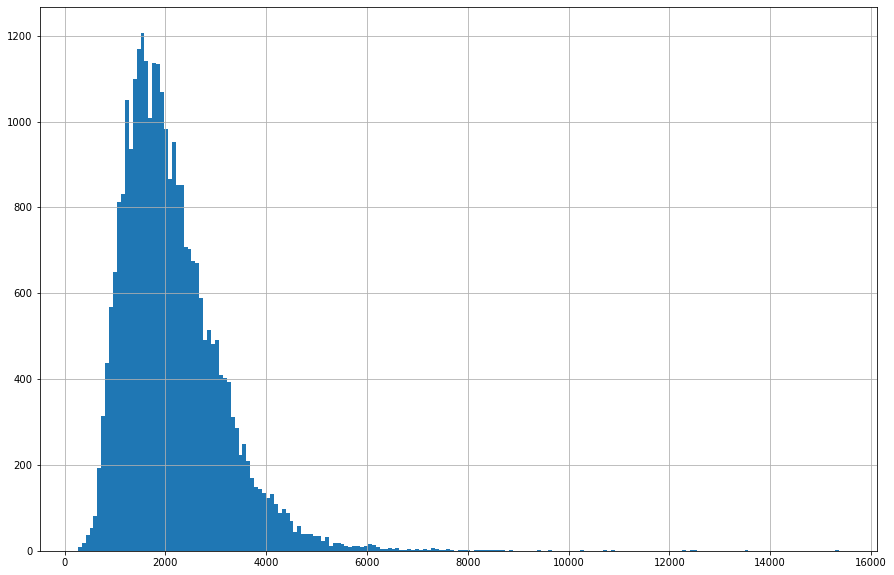

In [32]:
kc['sqft_living'].hist(figsize=(15,10), bins="auto");

As we can see above, it looks like normal curve with a slight left skew. There's also a long tail, where it appears to contain some exceptionally large size homes.

In [33]:
kc['sqft_living'].describe()

count    29187.000000
mean      2131.765649
std        976.219778
min        260.000000
25%       1440.000000
50%       1940.000000
75%       2640.000000
max      15360.000000
Name: sqft_living, dtype: float64

We can see here the maximum is quite high compared to the 75% percentile. And we have quite a tail. Let's see what the 99th percentile is.

In [34]:
import numpy as np

sqft_outlier = np.percentile(kc['sqft_living'], 99)
sqft_outlier

5190.0

Now, let's took a look at the price.

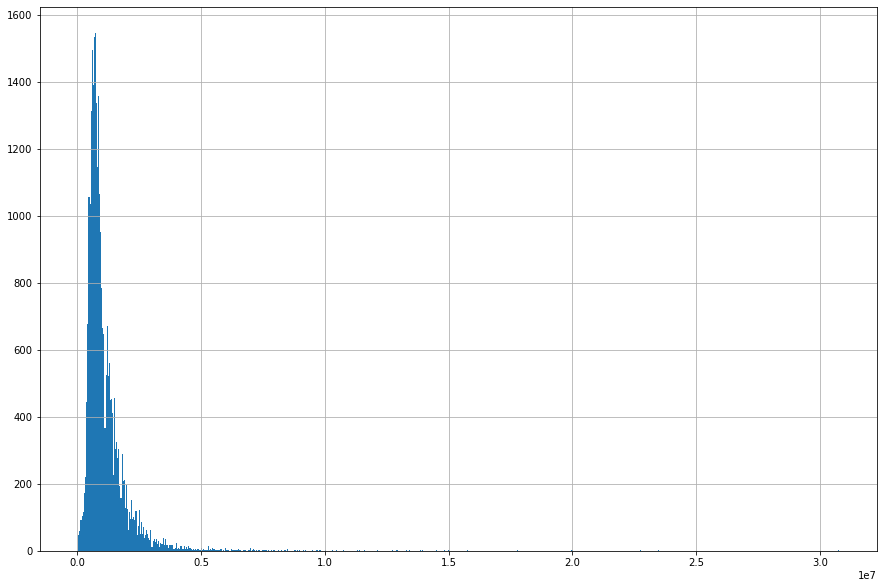

In [35]:
kc['price'].hist(figsize=(15,10), bins="auto");

As we can see above, it looks like normal curve with a slight left skew. There's also a long tail, where it appears to contain some exceptionally expensive  homes.

In [36]:
kc['price'].describe()

count    2.918700e+04
mean     1.113111e+06
std      8.955589e+05
min      2.736000e+04
25%      6.450000e+05
50%      8.680000e+05
75%      1.310000e+06
max      3.075000e+07
Name: price, dtype: float64

AS with `sqft_living`, the maximum is quite high compared to the 75% percentile. And we have quite a tail. Let's see what the 98th percentile is.

In [37]:
price_outlier = np.percentile(kc['price'], 99)
price_outlier

4300000.0

The 99th percentile for homes is 4.3M. This is about 14% of our maximum, which was 30M.

Let's go ahead and get rid of the outliers above 99th percentile for both for each variable

In [38]:
kc.drop(kc[kc['sqft_living'] > sqft_outlier].index, inplace=True)

kc['sqft_living'].describe()

count    28899.000000
mean      2089.673276
std        874.068860
min        260.000000
25%       1440.000000
50%       1940.000000
75%       2610.000000
max       5190.000000
Name: sqft_living, dtype: float64

We went from 29,187 entries to 28,899, with our max being 5,190 sq. ft. This looks reasonable and we will note to our audience that our analysis only includes houses less than 5200 sq. ft.

In [39]:
kc.drop(kc[kc['price'] > price_outlier].index, inplace=True)

kc['price'].describe()

count    2.872600e+04
mean     1.046535e+06
std      6.156467e+05
min      2.736000e+04
25%      6.400000e+05
50%      8.600000e+05
75%      1.295000e+06
max      4.300000e+06
Name: price, dtype: float64

This looks good. We went from 28,899 entries to 28,726, with our max being 3.45M. We will note to our audience that our analysis doesn't include houses more than 3.45

## 6 - Start Modeling the Baseline

Let's plot sqft vs price to see if it's a good candidate for linear regression.

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

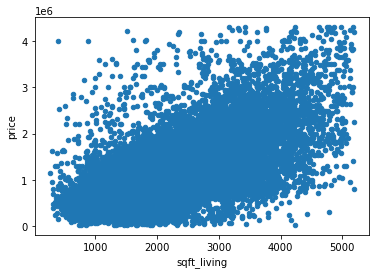

In [40]:
kc.plot.scatter("sqft_living","price")

So, it looks like we can see some linear relationship - as sqft_living goes up, so does the price. It's clearly not a 1 to 1, but let's do a deep dive into the data and see what's what.

So, I'm going to run a linear regression to see what we get.

In [41]:
import statsmodels.api as sm

X = kc['sqft_living']
y = kc['price']

baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                 1.862e+04
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:16:09   Log-Likelihood:            -4.1651e+05
No. Observations:               28726   AIC:                         8.330e+05
Df Residuals:                   28724   BIC:                         8.330e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.155e+05   7386.375     15.636      

## Results Discussion

The model overall explains about 39% of the variance in sale price, which is low.

Using the standard alpha of 0.05 to evaluate statistical significance:

Coefficients for the intercept as well sqft_living are all statistically significant.  According to the model, houses are selling at approximately $447/sq. ft.

The coefficients for the intercept is positive. What does that mean? Well, for a house with 0 sq ft, it would sell for $115,000. Let's see how this looks on the plot.

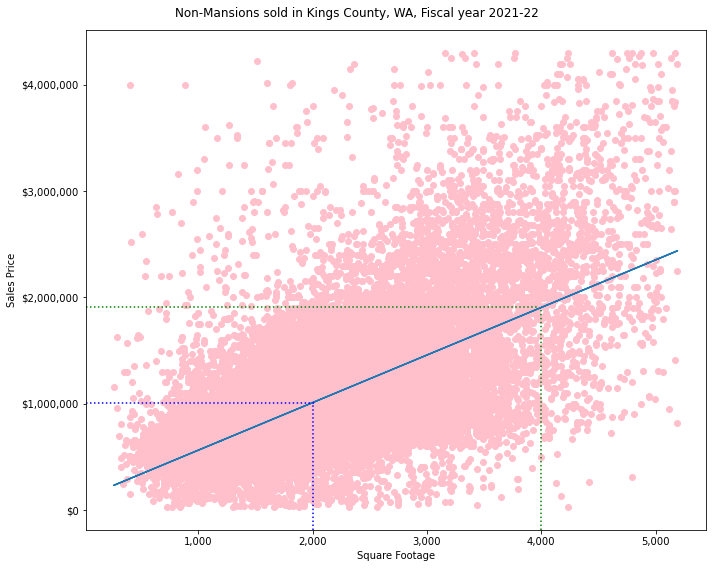

In [42]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(X, y, color='pink')
ax.plot(X, baseline_results.predict(sm.add_constant(X)))
ax.axvline (x = 2000, color = "blue", linestyle = ":", ymax=.25)
ax.axhline (y = 1009000, color = "blue", linestyle = ":", xmax = .37)

ax.axvline (x = 4000, color = "green", linestyle = ":", ymax=.44)
ax.axhline (y = 1910000, color = "green", linestyle = ":", xmax = .73)
ax.set_xlabel('Square Footage')
ax.set_ylabel('Sales Price')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('{x:,.0f}')
fig.suptitle("Non-Mansions sold in Kings County, WA, Fiscal year 2021-22");
fig.tight_layout()

#ax.axvline (x = <x_position>, color = <line_color>, linestyle= <line_style);

We can see with our data that we have a reasonable plot, but there's still quite a bit of variance.
With houses are selling at approximately USD 447/sq. ft, we can see that a 2,000 sq. ft home would go for nearly 1M. Wowsers. A 4,000 sq. ft home would sell for approximately 2M.

## 7. Refining and Iterating for Additional Factors, like ZipCode.
Let's add our categorical data. Our primary goal with this analysis is to include zipcode. We know that

### Zipcode analysis.
To create the one-hot encoding with the categorical data for zipcode. We'll combine the square footage and zipcode columns and do one-hot encoding with dummy values.

In [43]:
zip_sq_ft = ['sqft_living', 'zipcode']

X_zip_sq_ft = kc[zip_sq_ft]

X_zip_sq_ft_dummy = pd.get_dummies(X_zip_sq_ft, columns=['zipcode'])

#let's drop zipcode 98070 as it is the most common zipcode
X_zip_sq_ft_dummy.drop('zipcode_98070', axis = 1, inplace = True)

#let's run our model
sq_ft_zip_model = sm.OLS(y, sm.add_constant(X_zip_sq_ft_dummy))
sq_ft_zip_results = sq_ft_zip_model.fit()

print(sq_ft_zip_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     809.2
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:16:21   Log-Likelihood:            -4.0710e+05
No. Observations:               28726   AIC:                         8.143e+05
Df Residuals:                   28648   BIC:                         8.150e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.952e+05   2.35e+04     12.549

OKay, so what does this model show? We've got improvements in our Adjusted R-Square, which is now showing a value of 68.4% of all variance accounted for. This is better.

Using the standard alpha of 0.05 to evaluate statistical significance:

Coefficients for sqft_living and most of our zipcodes are statistically significant. Our baseline zipcode is 98070. It seems that relative to our baseline, the zipcodes do have a statistically significant effect on price, except for zipcodes 98224, 98113, 98118, 98027, and 98011). So... 

According to the model, houses are selling at approximately $374/sq. ft.

The coefficients for the intercept is 295,200. That means that, when not accounting for square footage or zipcode, you could assume a house will sell for 295,200. That's quite a premium.

The zipcode with the largest effect is zipcode 98004, 98005, 98039, and 98040. Zipcode 98065, 98092, 98001, 98003, 98023, have the most negative effect on pricing. 

Let's go ahead an plot an example to show the effect. For example, I'll go ahead and pick two zipcodes, 98004 and 98023, that have a positive and negative impact, respectively.

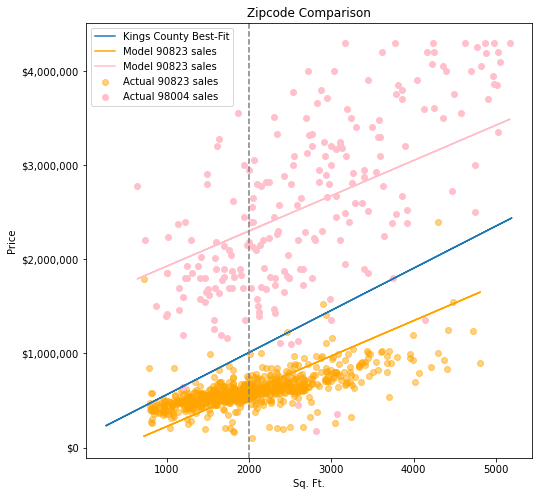

In [44]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(X, baseline_results.predict(sm.add_constant(X)), label = "Kings County Best-Fit")

#and now, scatter plot one of the lest expensive zipcodes
X_graph = X_zip_sq_ft_dummy[X_zip_sq_ft_dummy['zipcode_98023'] ==1]['sqft_living']
Y_graph = X_graph.to_frame().join(kc['price'],how="inner")           
ax.scatter(X_graph, Y_graph['price'], color='orange', label = 'Actual 90823 sales', alpha = .5)

#and now, model plot one of the lest expensive zipcodes
slope = sq_ft_zip_results.params["sqft_living"]
intercept = sq_ft_zip_results.params["const"]
zipeffect_90023 = sq_ft_zip_results.params["zipcode_98023"]
fit_line_90023 = slope * X_graph + intercept + zipeffect_90023
ax.plot(X_graph, fit_line_90023, color = 'orange', label = 'Model 90823 sales')

#and now, one of the more expensive zipcodes
X_graph = X_zip_sq_ft_dummy[X_zip_sq_ft_dummy['zipcode_98004'] ==1]['sqft_living']
Y_graph = X_graph.to_frame().join(kc['price'],how="inner")           
ax.scatter(X_graph, Y_graph['price'], color='pink', label = 'Actual 98004 sales')
#ax.plot(X_graph, sq_ft_zip_results.predict(sm.add_constant(X_graph)), color='pink')

#and now, model plot one of the lest expensive zipcodes
slope = sq_ft_zip_results.params["sqft_living"]
intercept = sq_ft_zip_results.params["const"]
zipeffect_98004 = sq_ft_zip_results.params["zipcode_98004"]
fit_line_90004 = slope * X_graph + intercept + zipeffect_98004
ax.plot(X_graph, fit_line_90004, color = 'pink', label = 'Model 90823 sales')

#make vertical and horizontal lines showing 2,000 sq ft homes in each zipcode using hardcoded numbers
ax.axvline (x = 2000, color = "gray", linestyle = "dashed")
#ax.axhline (y = 2300000, color = "black", linestyle = "dashed", xmax = .37)
#ax.axhline (y = 580000, color = "black", linestyle = "dashed", xmax = .37)


ax.set_xlabel('Sq. Ft.')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_title("Zipcode Comparison");
ax.legend()

Let's see a list of the most impactful zicodes.

In [45]:
#from the zipcode list, create
best_worst_zips = sq_ft_zip_results.params
zipslist = best_worst_zips.sort_values(ascending=True)
zipslist1 = zipslist.drop(zipslist.index[4:78])
zipslist2 = zipslist.drop(zipslist.index[0:74])

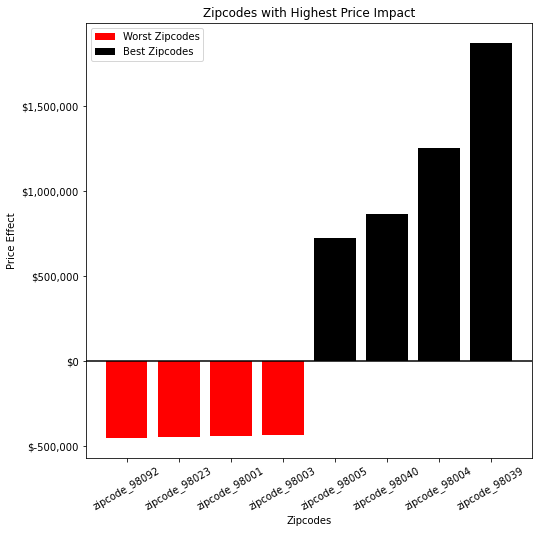

In [46]:
fig, ax = plt.subplots(figsize = (8,8))

ax.bar(x=zipslist1.index, height=zipslist1.values, color='red', label = 'Worst Zipcodes')
ax.bar(x=zipslist2.index, height=zipslist2.values, color='black', label = 'Best Zipcodes')

ax.set_xlabel('Zipcodes')
ax.set_ylabel('Price Effect')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_title("Zipcodes with Highest Price Impact");
ax.tick_params(axis='x', labelrotation = 30)
ax.axhline (y = 0, color = "black")
ax.legend()

So we can see here how the zipcode does effect whether it's above or below the "mean" square footage line that we spoke of earlier.

For zipcode 90004, the prices are on average 1.25M higher than the mean, which for now we assume to be Zipcode 98070. For the 2,000 sq. ft home example, or "mean" home would be 1M, but our price, according to the model, would be 2.25M.

Vice Versa, for zipcode 908023, the prices are on average are 449,000 less than our typical zipcode. As you can see, our 2,000 sq.ft. home would now cost 550,000 

## 9. Refining and Iterating for Additional Factors.

### Closing Date.
Another important factor is the time of year that a house gets sold. We know informally that houses don't sell as well when the weather is bad and that prices change with the year. Let's see how much they differ.

I'm going to plot the prices overall and see what emerges


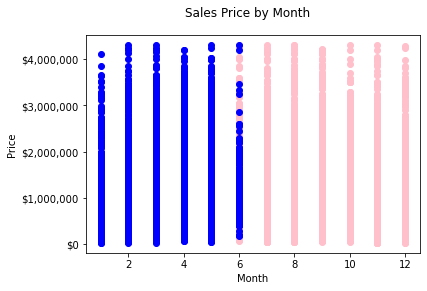

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

year2021 = kc[kc['sales_year']=='2021']
year2022 = kc[kc['sales_year']=='2022']


ax.scatter(year2021['sales_month'], year2021['price'], color='pink', label='2021')
ax.scatter(year2022['sales_month'], year2022['price'], color='blue', label='2022')
ax.set_xlabel('Month')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter('${x:,.0f}')
fig.suptitle("Sales Price by Month");

Okay, it looks as though we only have sales data for 1 year. That means the sales year won't be a factor in our analysis. Let's take a look at monthly mean data and see if that reveals anything.

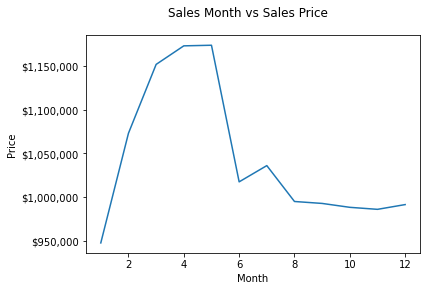

In [78]:
fig, ax = plt.subplots()

ax.plot(kc.groupby(['sales_month'])['price'].mean())

ax.set_xlabel('Month')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter('${x:,.0f}')
fig.suptitle("Sales Month vs Sales Price");

Okay, so we can see a clear trend here. With our peak season occuring in May and our low happening in January. This makes sense. This is also going to be a good candidate for our one-hot encoding, because while there is a trend, there's no LINEAR RELATIONSHIP here.

So, let's un an analysis to factor the month of the year. We'll get rid of the month of June, as it appears to occur sort of in the middle.

In [49]:
X_combined_sales_month = X_zip_sq_ft_dummy.join(kc['sales_month'], how="inner")
X_combined_sales_month = pd.get_dummies(X_combined_sales_month, columns=['sales_month'])

#let's drop zipcode 'sales_month_6' as it seems to have the average prices
X_combined_sales_month.drop('sales_month_7', axis = 1, inplace = True)

X_combined_sales_month_model = sm.OLS(y, sm.add_constant(X_combined_sales_month))
X_combined_sales_month_results = X_combined_sales_month_model.fit()

### Additional Numeric Factors

So, we have a decent model with regard to Adjusted R-square, but let's see if we can do better. Let's examine...

#### Linearity

I'm going to plot some independent variables and see if they have any effect on our target, or dependent variable.

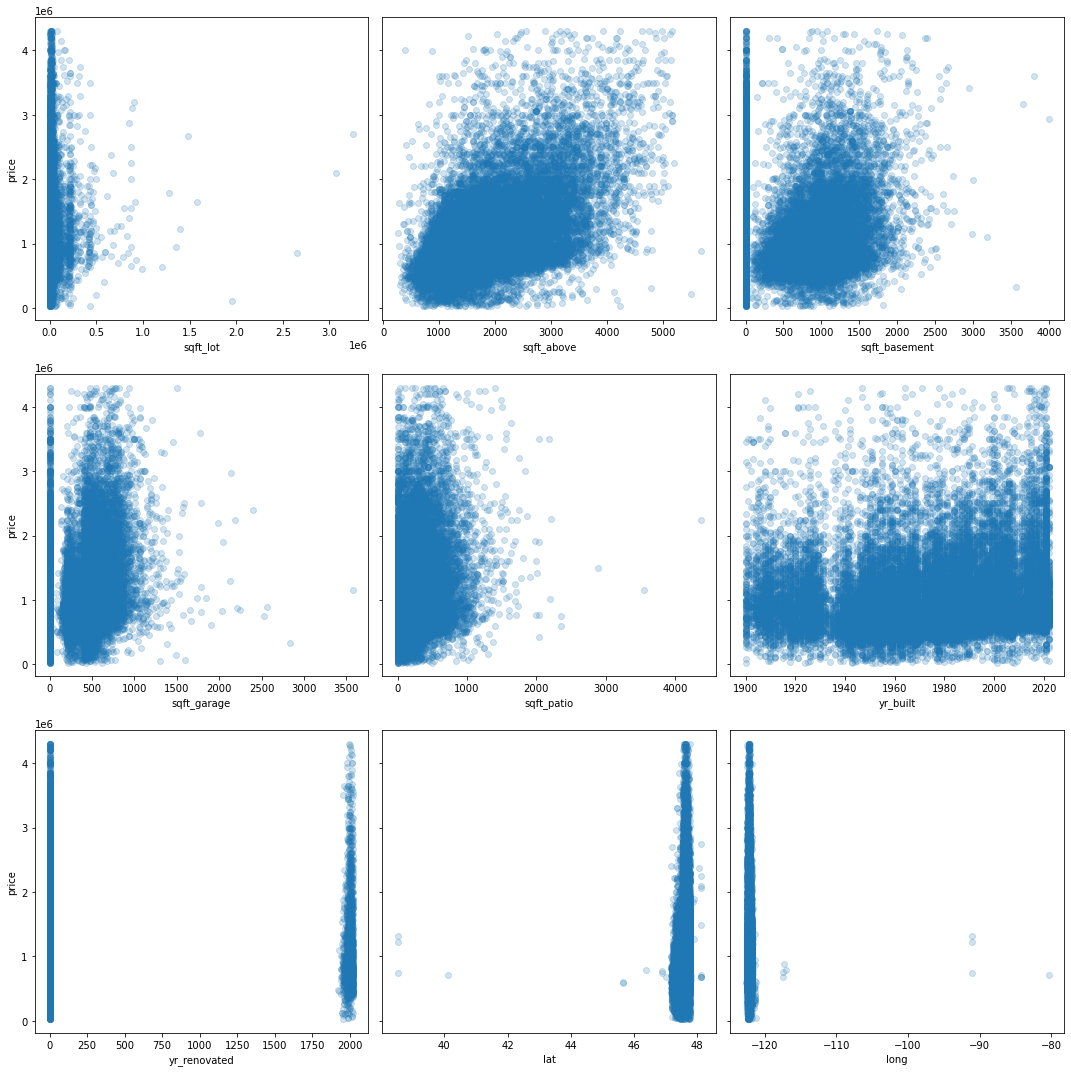

In [50]:
import matplotlib.pyplot as plt
import numpy as np

X = kc[numeric_cont].drop("date", axis=1)
X = X.drop("price", axis=1)
X = X.drop("sqft_living", axis=1)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("price")

fig.tight_layout()

Interesting... we don't have any great linear relationships here that wouldn't already be collinear with. For example, there are a a few sqft variables that could effect the price, but we know.

Perhaps we can try log relationships. There may be some good candidates. This time, we'll try with logs for both the target and variables.

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


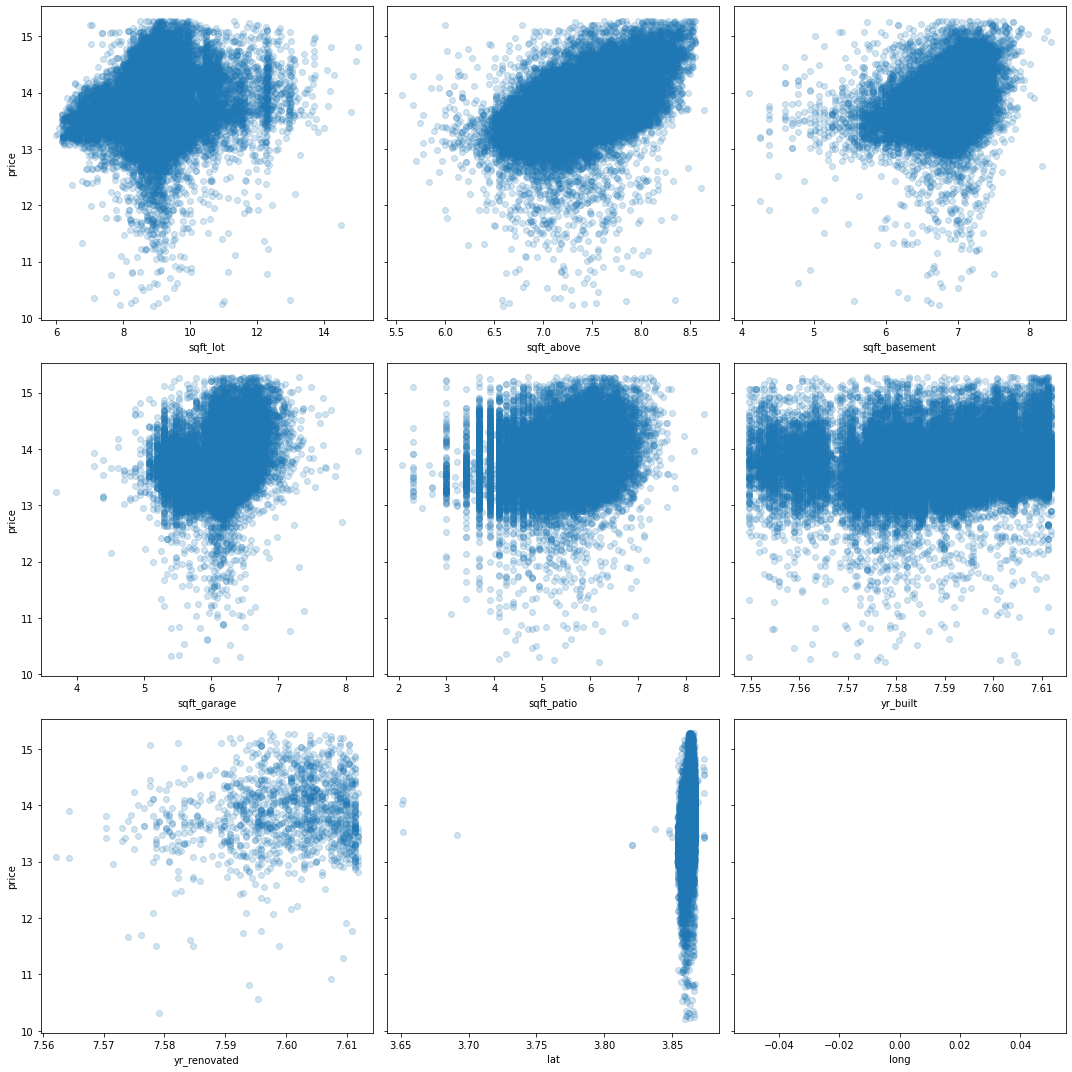

In [51]:
import matplotlib.pyplot as plt
import numpy as np

X = kc[numeric_cont].drop("date", axis=1)
X = X.drop("price", axis=1)
X = X.drop("sqft_living", axis=1)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(np.log(X[column]), np.log(y), alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("price")

fig.tight_layout()

Wow! nothing is really standing out. Let's look at just the log of the variables and leave the y as is.

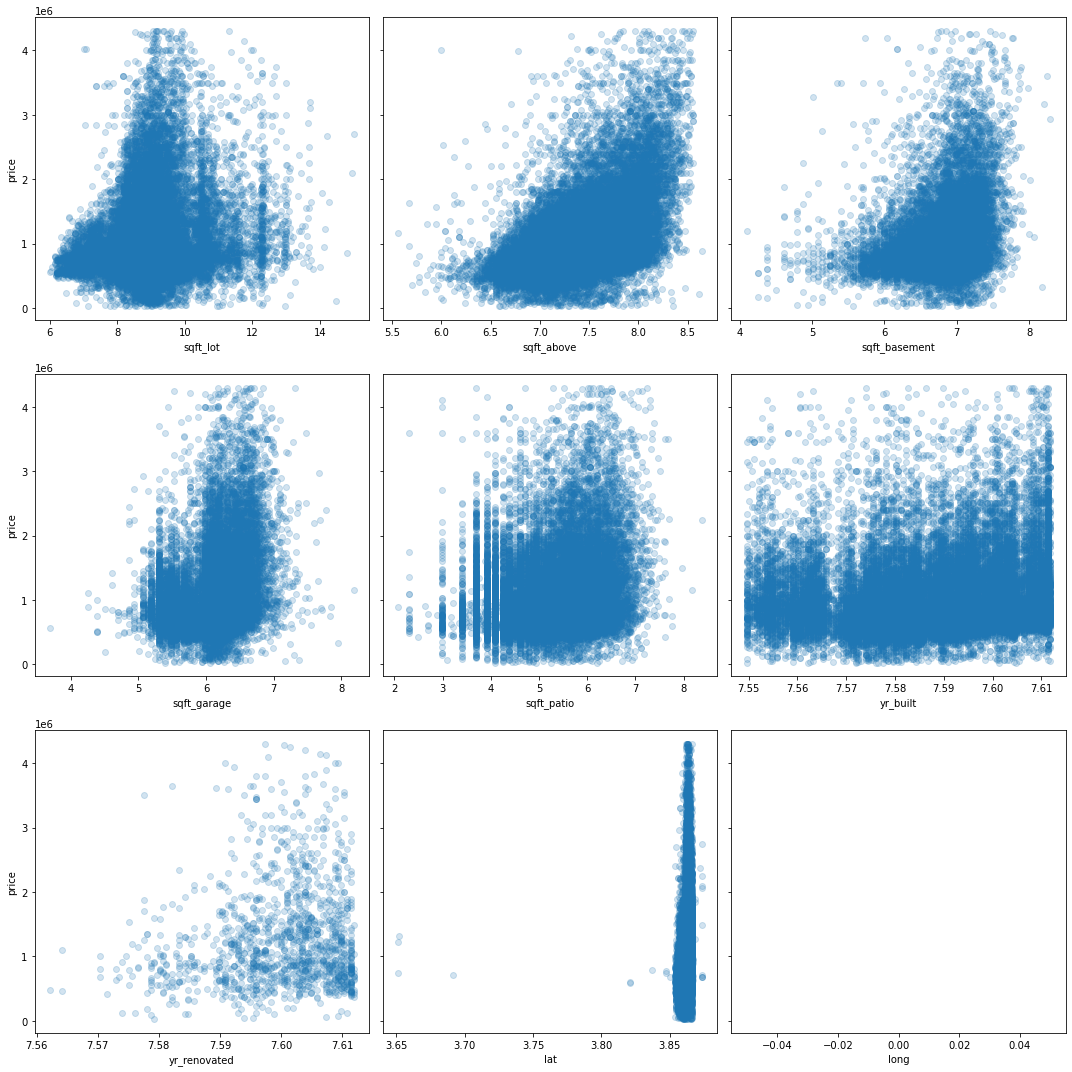

In [52]:
X = kc[numeric_cont].drop("date", axis=1)
X = X.drop("price", axis=1)
X = X.drop("sqft_living", axis=1)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(np.log(X[column]), y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("price")

fig.tight_layout()

I see nothing that really jumps out. Based on these graphs for the numeric columns, I feel comfortable that we've already located linear relationships without incuring major collinearity.

### Discrete Numeric Variables.
We've got multiple discrete numeric functions which will have an effect of the saleprice. To get a high level view of this, let's look at all of the numeric variables, besides square footage.

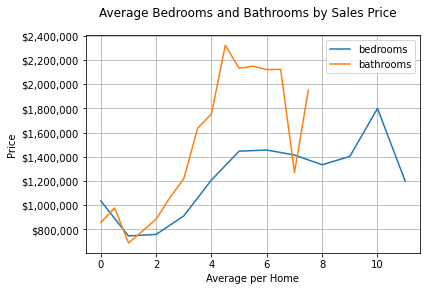

In [53]:
fig, ax = plt.subplots()

ax.plot(kc.groupby(['bedrooms'])['price'].mean(), label = "bedrooms")
ax.plot(kc.groupby(['bathrooms'])['price'].mean(), label = "bathrooms")

ax.set_xlabel('Average per Home')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter('${x:,.0f}')
fig.suptitle("Average Bedrooms and Bathrooms by Sales Price");

ax.grid('on', which='minor', axis='x' )
ax.grid('off', which='major', axis='x' )
ax.grid('on', which='minor', axis='y' )
ax.grid('off', which='major', axis='y' )

ax.legend()

Interesting, so... a few things jump out. 1. Bathrooms is not really that linear, with peak prices occurring at 4.5 baths. 2. Bedrooms could be interpreted as linear, but really it's showing something similar to bathrooms, namely a peak or flattening around 5 bathrooms. In fact, there appears to be some errant data around 10 bathrooms, which does seem like an outlier. Let's look at the stats.

In [54]:
kc[numeric_disc].describe()

,bedrooms,bathrooms,floors
count,28726.000000,28726.000000,28726.000000
mean,3.420769,2.300442,1.511523
std,0.957244,0.837446,0.547395
min,0.000000,0.000000,1.000000
25%,3.000000,2.000000,1.000000
50%,3.000000,2.500000,1.500000
75%,4.000000,3.000000,2.000000
max,11.000000,7.500000,4.000000


This is interesting, we the median home is a 3 bedroom, 2.5 bath. When we graphs the medians of bathroom and bedrooms, we see a peek around in price around 4 bedrooms.

### Grade as a Category

One column we haven't addressed yet, is the the grade column. Remember, this is an overall grade on the home based on the design and construction and quality of the house.

First, let's see an effect that intgrade would have on priceand sq.ft .

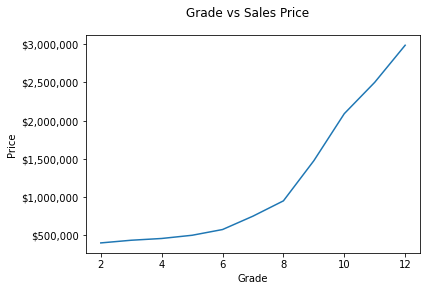

In [56]:
fig, ax = plt.subplots()

ax.plot(kc.groupby(['intgrade'])['price'].median())

ax.set_xlabel('Grade')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter('${x:,.0f}')
fig.suptitle("Grade vs Sales Price");

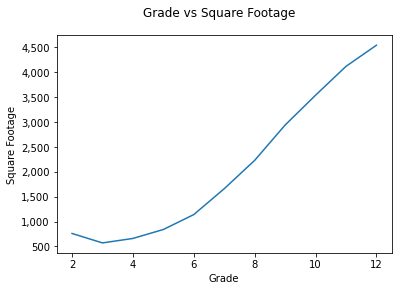

In [59]:
fig, ax = plt.subplots()

ax.plot(kc.groupby(['intgrade'])['sqft_living'].median())

ax.set_xlabel('Grade')
ax.set_ylabel('Square Footage')
ax.yaxis.set_major_formatter('{x:,.0f}')
fig.suptitle("Grade vs Square Footage");


Yup, that look's sort of linearish for both price and sq. footage. This isn't a great sign, and we should probably avoid using this to avoid collinearity.

### Add Year to the Model

In [60]:
#let's join year_built_transform to our exciting data set of independent variables
X_combined_year = X_combined_sales_month.join(kc['yr_built_transform'], how="inner")

#let's create the model
X_combined_year_model = sm.OLS(y, sm.add_constant(X_combined_year))
X_combined_year_results = X_combined_year_model.fit()


### Condition as a Category
Let's try to add the condition as well. This variable represents an assessment of the overall condition of the house, with regard to maintenance. Let's add it to the model

In [61]:
#let's join `condition` to our data set of independent variables
X_combined_condition = X_combined_year.join(kc['condition'], how="inner")
X_combined_condition = pd.get_dummies(X_combined_condition, columns=['condition'])

In [62]:
#let's drop 'condition_Average' as it is the average rating
X_combined_condition.drop('condition_Average', axis = 1, inplace = True)

#let's create the model
X_combined_condition_model = sm.OLS(y, sm.add_constant(X_combined_condition))
X_combined_condition_results = X_combined_condition_model.fit()

### View as a Category

Let's look at two more categories that may help us out. View and Waterfront. We always here how much a view might be worth, or how nice something is on water. So let's see.

In [63]:
#let's join the variable we want and then one-hot encode it.
X_combined_view = X_combined_condition.join(kc['view'], how="inner")
X_combined_view = pd.get_dummies(X_combined_view, columns=['view'])

#let's drop zipcode 'intgrade_7' as it is the most common zipcode
X_combined_view.drop('view_NONE', axis = 1, inplace = True)

#let's create the model
X_combined_view_model = sm.OLS(y, sm.add_constant(X_combined_view))
X_combined_view_results = X_combined_view_model.fit()

### Waterfront as a Category

Aha! We do see that adding the View does appear to have some value. In fact, anywhere from 578k to 155k, compared to a home with no view at all. So let's check out the water.

In [64]:
#let's join the variable we want and then one-hot encode it.
X_combined_water = X_combined_view.join(kc['waterfront'], how="inner")
X_combined_water = pd.get_dummies(X_combined_water, columns=['waterfront'])

#let's drop zipcode 'intgrade_7' as it is the most common zipcode
X_combined_water.drop('waterfront_NO', axis = 1, inplace = True)

#let's create the model
X_combined_water_model = sm.OLS(y, sm.add_constant(X_combined_water))
X_combined_water_results = X_combined_water_model.fit()


### Greenbelt as a Category

Let's include Greenbelt as well. Greenbelt, just means undeveloped property adjacent to the property. We will one-hot encode it and drop the `greenbelt_NO`, which is the typical condition.

In [66]:
X_combined_greenbelt = X_combined_water.join(kc['greenbelt'], how="inner")
X_combined_greenbelt = pd.get_dummies(X_combined_greenbelt, columns=['greenbelt'])

#let's drop zipcode 'intgrade_7' as it is the most common zipcode
X_combined_greenbelt.drop('greenbelt_NO', axis = 1, inplace = True)

X_combined_greenbelt_model = sm.OLS(y, sm.add_constant(X_combined_greenbelt))
X_combined_greenbelt_results = X_combined_greenbelt_model.fit()

print(X_combined_greenbelt_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     770.0
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:19:41   Log-Likelihood:            -4.0504e+05
No. Observations:               28726   AIC:                         8.103e+05
Df Residuals:                   28626   BIC:                         8.111e+05
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.193e+04   2

### Final Model Results

Okay, this feels like a reasonable model. Let's review some of the statistics.

Our Adjusted R-Square is now showing a value of 72.7% of all variance accounted for. This is better, but one wonders if 5% increase when accounting for all of these models is really worth it. But... anyways.

Using the standard alpha of 0.05 to evaluate statistical significance:

Coefficients for sqft_living and most of our zipcodes are statistically significant. Our baseline zipcode is 98070. It seems that relative to our baseline, the zipcodes do have a statistically significant effect on price, except for zipcodes 98014, 98019, 98045, 98050, 98056, 98059, 98108, 98118, 98126, 98133, 982242). So...

Our coefficient for the intercept is not significanty significant for an alpha of .05.

According to the model, houses are selling at approximately $355/sq. ft.

The coefficients for the intercept is 51,930. That means that, when not accounting for square footage or zipcode, you could assume a house will sell for 51,930. 

The zipcode with the largest effect is zipcode 98004, 98005, 98039, and 98040. Zipcode 98010, 98001, 98003, 98023, have the most negative effect on pricing.

Now that we have this model, let's double check for errors.



## 10. Checking for Errors and Accuracy of the Model

To do this, I'm going to check the assumptions of Linear Regression. First, let's make sure there's no collinearity.

### Check for Collinearity

To do this, we're going to create a correlation matrix, and view it on a heat map. Basically, we're looking for anything that is very dark blue or higher

<AxesSubplot:>

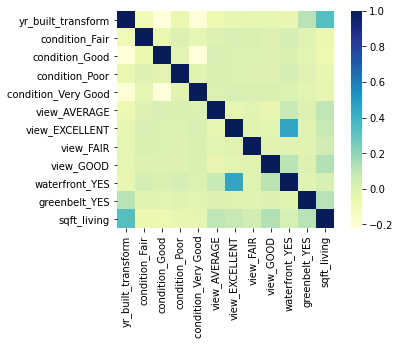

In [67]:
import seaborn as sns

corr_check = X_combined_greenbelt.loc[:,'yr_built_transform':'greenbelt_YES']
corr_check = corr_check.join(kc['sqft_living'], how="inner")


sns.heatmap(corr_check.corr(), cmap='YlGnBu', square=True)

It looks as though there isn't much correlation, which is good. There some deep bluish-greenish between `view_EXCELLENT` and `waterfront_YES`, which makes sense. I'll remove `view_EXCELLENT`.

Also, there seems to be some issues with the `yr_built_transform` variable. I see some correlation between `yr_built_transform` and `intgrades`. I'll remove `yr_built_transform` as it seems to have a small effect at $401/yr. 

So I'm going to go ahead and drop those items, and let's see where we land.

In [68]:
X_combined_greenbelt.drop('waterfront_YES', axis = 1, inplace = True)
X_combined_greenbelt.drop('yr_built_transform', axis = 1, inplace = True)

X_combined_greenbelt_model = sm.OLS(y, sm.add_constant(X_combined_greenbelt))
X_combined_greenbelt_results = X_combined_greenbelt_model.fit()

Let's continue to check a few of these things. To make sure we have a model that's nice an linear, let's go ahead and check a few more assumptions of linearity.

First, let's do some error testing.

### Error Testing

#### MAE

I'm going to investigate the residuals and see how it looks. First, let's check the Mean Asbolute Error (MAE)

In [80]:
y_pred = X_combined_greenbelt_results.fittedvalues
y = kc["price"]

mae_resid = np.mean(np.abs(y - y_pred))
mae_resid

212706.98225099346

The model informs us that we have a mean average error of about $215,000 (200,259). 

#### RMSE

Let's see what the Root Mean Squared Error (RMSE) is:

In [70]:
rmse_residuals = np.sqrt(X_combined_greenbelt_results.mse_resid)
rmse_residuals

323211.54707118793

So here, the RMSE is about $323,000. Because the RMSE > MAE, there may be more outliers in our data even though we eliminated the top 1% for square footage and price.

### Linearity

We covered this in previous sections. I feel comfortable that we've included most of the variables with some linear properties while avoiding collinearity.

### Homoscedasticity
Homoscedasticity is the observation that the magnitude of the errors (or residuals) is the same no matter what the input, or independent variable is. The most effective way to observe this is by plotting the residuals against the predicted values. Homoscedasticity will result in a straight line around the max residuals. Heteroscedasticity will result in a curved line around the max residuals

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


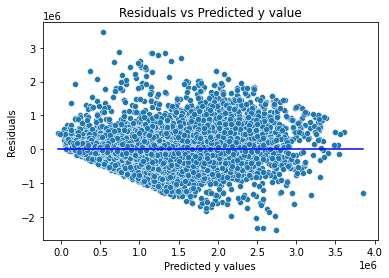

In [71]:
residuals = X_combined_greenbelt_results.resid 

p = sns.scatterplot(y_pred,residuals)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')
#plt.xlim(70,100)
p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='blue')
p = plt.title('Residuals vs Predicted y value')

Okay, this... doesn't look flat, but we do see consistency in the errors of the model. It appears we are getting a blob shape here, meaning we got consistent errors as our predicted value get higher. Let's do another test. The dreaded, Goldfeld Quandt Test.

In [72]:
# run Goldfeld Quandt Test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']


test = sms.het_goldfeldquandt(residuals, sm.add_constant(X_combined_greenbelt))
lzip(name, test)

[('F statistic', 1.0237944110966875), ('p-value', 0.08011863682380574)]

Here our p-value is 0.08 greater than 0.05. This means we are not able to reject the null hypothesis which states our error terms are homoscedastic.

This further validates the assumption of homoscedasticity of our residuals. Even though it ain't the prettiest thing.

So... we're comfortable with the model, let's discuss the results.

## 11. Discussion of Results

If you recally, we discussed previously how, in general, Kings County had on a price of 447/sq.ft County wide.

After we accounted for zipcode, we saw quite a shift depending on where our home was located.

But what about the other features that we added. Let's run our model one more time to determine all of our coefficients.



In [73]:
X_combined_greenbelt_model = sm.OLS(y, sm.add_constant(X_combined_greenbelt))
X_combined_greenbelt_results = X_combined_greenbelt_model.fit()

print(X_combined_greenbelt_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     779.3
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:20:09   Log-Likelihood:            -4.0513e+05
No. Observations:               28726   AIC:                         8.105e+05
Df Residuals:                   28628   BIC:                         8.113e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.12e+05   2

Okay, this feels like a reasonable model. Let's review some of the statistics.

Our Adjusted R-Square is now showing a value of 72.4% of all variance accounted for. This is better, but one wonders if 4% increase when accounting for all of these models is really worth it. But... anyways.

Using the standard alpha of 0.05 to evaluate statistical significance:

Coefficients for sqft_living and most of our zipcodes are statistically significant. Our baseline zipcode is 98070. It seems that relative to our baseline, the zipcodes do have a statistically significant effect on price, except for zipcodes 98014, 98019, 98045, 98050, 98056, 98059, 98065, 98118, 98126, 98133, 98155, 98224). So...

Our coefficient for the intercept is not significanty significant for an alpha of .05.

According to the model, houses are selling at approximately $357/sq. ft.

The coefficients for the intercept is 112,000. That means that, when not accounting for square footage or zipcode, you could assume a house will sell for 112,000. 

The zipcodes with the largest effect are 98004, 98005, 98033, 98039, and 98040. Zipcode 98010, 98001, 98003, 98023, and  98092 have the most negative effect on pricing.


### Quantifying additional features besides square footage and zipcode

In [74]:
features = X_combined_greenbelt_results.params

features = features.drop(features.index[0:89])

features.sort_values(ascending = True, inplace = True)

features_red = features.drop(features.index[2:10])
features_black = features.drop(features.index[0:2])


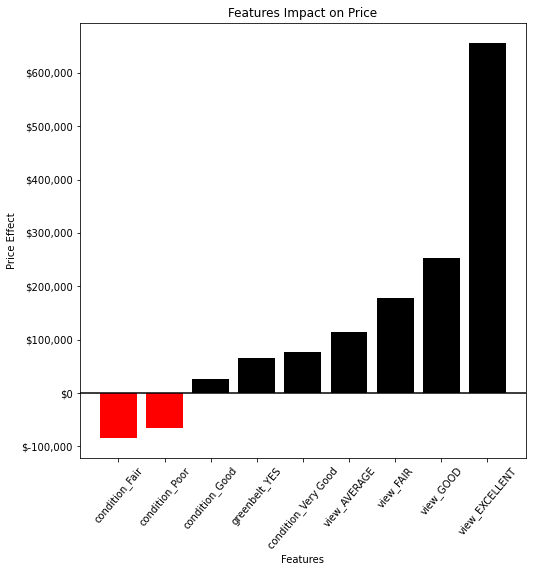

In [75]:
fig, ax = plt.subplots(figsize = (8,8))

ax.bar(x=features_red.index, height=features_red.values, color='red')
ax.bar(x=features_black.index, height=features_black.values, color='black')

ax.set_xlabel('Features')
ax.set_ylabel('Price Effect')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_title("Features Impact on Price");
ax.tick_params(axis='x', labelrotation = 50)
ax.axhline (y = 0, color = "black")

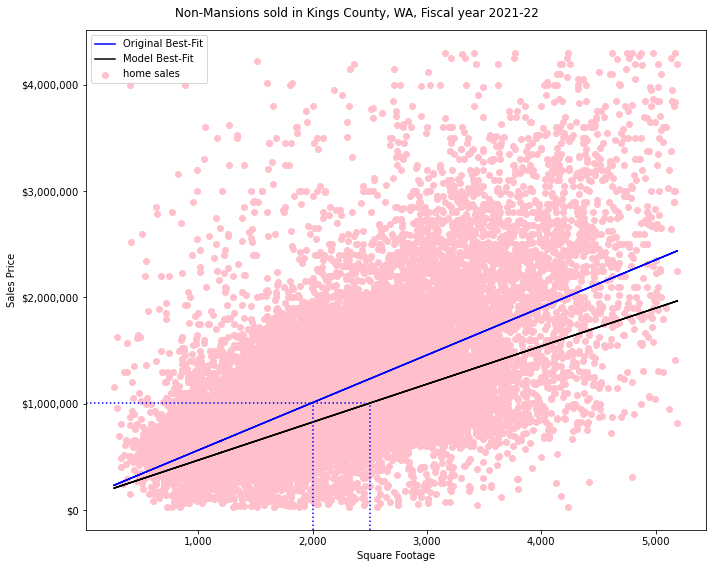

In [76]:
#let's make our plot
fig, ax = plt.subplots(figsize = (10,8))

#plot all of the home sales
X = kc['sqft_living']
y = kc['price']

ax.scatter(X, y, color='pink', label = 'home sales')

#plot best fit line of homesales using our very initial model
ax.plot(X, baseline_results.predict(sm.add_constant(X)), color = 'blue', label = "Original Best-Fit")

#we're going to create our "new" best fit line of sqft vs price based on our model
coeff = X_combined_greenbelt_results.params['const']
slope = X_combined_greenbelt_results.params['sqft_living']
adjusted_best_fit = X * slope + coeff
ax.plot(X, adjusted_best_fit, color = 'black',label = "Model Best-Fit")

#let's plot some vertical lines to show the square footage for a 1.009M home from original section
ax.axvline (x = 2000, color = "blue", linestyle = ":", ymax=.25)
ax.axhline (y = 1009000, color = "blue", linestyle = ":", xmax = .45)
ax.axvline (x = 2500, color = "blue", linestyle = ":", ymax=.25)
#ax.axhline (y = 1910000, color = "green", linestyle = ":", xmax = .73)

#plot characteristics
ax.set_xlabel('Square Footage')
ax.set_ylabel('Sales Price')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('{x:,.0f}')
fig.suptitle("Non-Mansions sold in Kings County, WA, Fiscal year 2021-22");
ax.legend()
fig.tight_layout()

We can see here, that home would have to be about 2500 sq. ft. to sell for the same amount that a 2,000 sq.ft. home would have to in our previous analyis. Why? Because now that we account for other factors (zipcode, additional features) the value of square footage has gone down.

Linearity